# Previsão de Vendas

- Objetivo: prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


- O gasto médio investido em anúncios na TV foi de 147.042500
- O gasto mínimo que já foi investido em anúncios na TV foi de 0.700000
- E o gasto máximo que já foi investido em anúncios na TV foi de 296.400000


- O gasto médio investido em anúncios na Rádio foi de 23.264000
- O gasto mínimo que já foi investido em anúncios na Rádio foi de 0.000000 
- E o gasto máximo que já foi investido em anúncios na Rádio foi de 114.000000


- O gasto médio investido em anúncios no Jornal foi de 30.554000
- O gasto mínimo que já foi investido em anúncios no Jornal foi de 0.300000
- E o gasto máximo que já foi investido em anúncios no Jornal foi de 114.000,00


- A média do que gerou em vendas foi de 15.130500
- O mínimo que gerou em vendas foi de 1.600000
- E o máximo que gerou em vendas foi de 27.000000

Comparando os gastos médios investidos em anúncios de TV, Rádio e Jornal, a ordem decrescente dos gastos seria:
1. TV
2. Jornal
3. Rádio

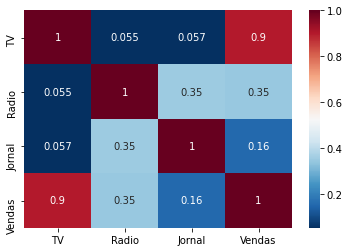

In [5]:
# Mapa de calor para visualizar as correlações

sns.heatmap(df.corr(), annot =True, cmap="RdBu_r")
plt.show()

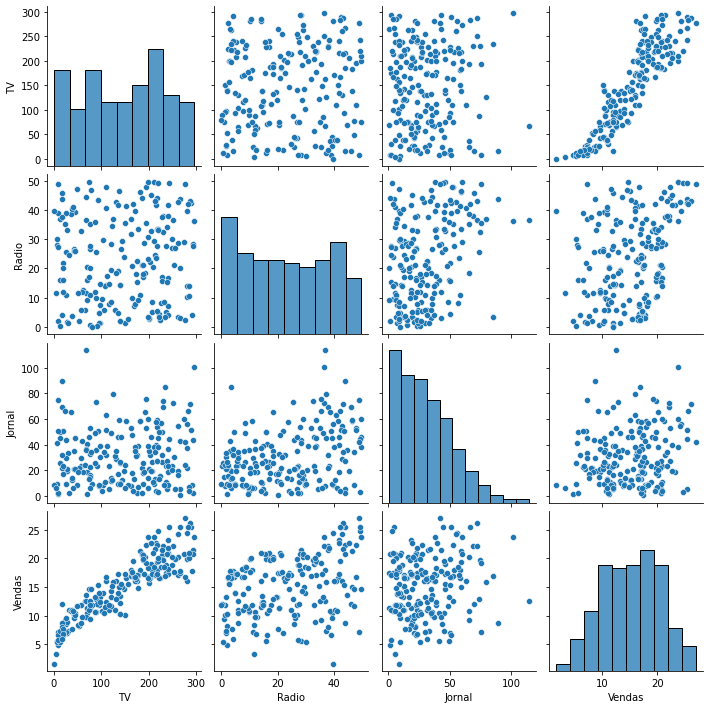

In [6]:
sns.pairplot(df)
plt.show()

- Vendas e TV com correlação alta. Provavelmente, quando aumenta o investimento em TV gera mais vendas.
- Ordem de correlação: 
1. TV
2. Rádio
3. Jornal

#### Separando os dados em dados de treino e dados de teste

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Problema de regressão - Os modelos que vamos usar:

- Regressão Linear
- Random Forest

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Teste e Avaliação do Melhor Modelo

- R² -> diz o % que o nosso modelo consegue explicar o que acontece
- MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [9]:
# previsões
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

# comparar modelos
r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684274
MSE da Regressão Linear: 2.3706599712256557
R² do Random Forest: 0.9643927347954816
MSE do Random Forest: 0.9087888000000012


- Random Forest teve um melhor desempenho (R² e MSE)

#### Visualização Gráfica das Previsões

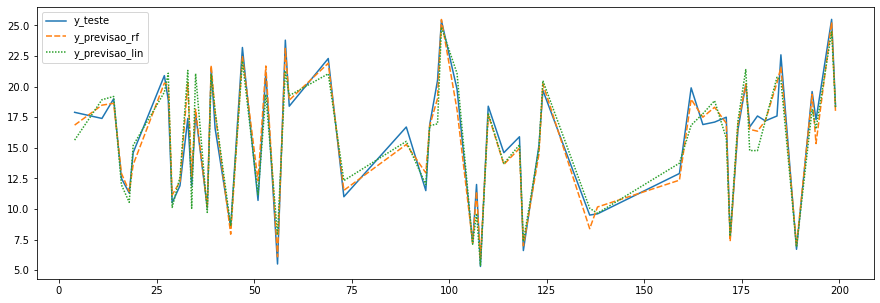

,y_teste,y_previsao_rf,y_previsao_lin
58,23.8,23.124,21.288161
40,16.6,17.858,18.042132
34,11.9,12.666,10.059590
102,19.8,18.110,21.082241
184,17.6,20.330,20.764760
198,25.5,25.272,24.471874
95,16.9,16.810,16.806436
4,17.9,16.855,15.628857
29,10.5,11.140,10.124799
168,17.1,18.316,18.846019


In [10]:
df_resultado = pd.DataFrame()

df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#### Qual a importância de cada variável para as vendas?

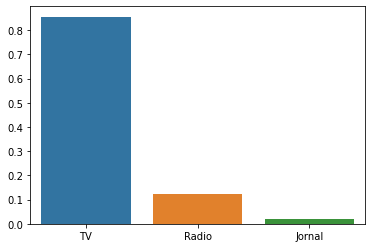

In [11]:
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

In [12]:
print(df[["TV", "Radio", "Jornal"]].sum())

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


Em ordem decrescente:
1. TV
2. Rádio
3. Jornal